In [1]:
# Extract Tweet of a Specific person :

#https://fairyonice.github.io/extract-someones-tweet-using-tweepy.html

In [2]:
# 1. Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tweepy
from tweepy import OAuthHandler

In [3]:
# 2.Set Connecion

#Get from developers.twitter.com/App->Setting->keys&tokens
#Just assign the credentials

consumer_key = "YCyZzlGlH4bVcgu9DEtXGGCtb"
consumer_secret = "zBH1Yus7hpCE7R1P9oRTqu7fHXzSKRzWNfGQRLQ3qA3HsuH3V5"
access_token = "1406151650465648640-HNSctNOHvpkYIiwNaUnIwCL6uhpycN"
access_token_secret = "fuR5lHVZKOdNB1Qn9A2awjzSuqtptFLwHu5muErvzH5gI"



# Use the above credentials to authenticate the API.

auth = tweepy.OAuthHandler( consumer_key , consumer_secret )
#auth.access_token_secret
auth.set_access_token( access_token , access_token_secret )

api = tweepy.API(auth)

In [4]:
# 3.To get the tweets in a Proper format, first lets create a Dataframe to store the extracted data.

df = pd.DataFrame(columns=["Date","User","IsVerified","Tweet","Likes","RT",'User_location'])
print(df)

Empty DataFrame
Columns: [Date, User, IsVerified, Tweet, Likes, RT, User_location]
Index: []


In [5]:
# We will use api as api.search inside this tweepy cursor.

In [6]:
# 4.Write a Function to extract tweets:

# We will Use **tweepy.cursor()** because we want to extract a larger number of tweets i.e over 100,500 etc


def get_tweets(Topic,Count):    
    i=0
    for tweet in tweepy.Cursor(api.search, q=Topic,count=100, lang="en",exclude='retweets').items():
        print(i, end='\r')
        df.loc[i,"Date"] = tweet.created_at
        df.loc[i,"User"] = tweet.user.name
        df.loc[i,"IsVerified"] = tweet.user.verified
        df.loc[i,"Tweet"] = tweet.text
        df.loc[i,"Likes"] = tweet.favorite_count
        df.loc[i,"RT"] = tweet.retweet_count
        df.loc[i,"User_location"] = tweet.user.location
        #df.to_csv("TweetDataset.csv",index=False)
        df.to_excel('{}.xlsx'.format("TweetDataset"),index=False)   ## Save as Excel
        i=i+1
        if i>Count:
            break
        else:
            pass
        

In [7]:
# Call the function to extract the data. pass the topic and filename you want the data to be stored in.
Topic=["cricket"]
get_tweets(Topic , Count=100)

In [8]:
df.head(8)

,Date,User,IsVerified,Tweet,Likes,RT,User_location
0,2021-07-21 06:50:15,Self-Exiled🟣🎙️🕵🏿‍♂️,False,"@aiki_sa LMAO!🤣 Actually, I'm quite fascinated...",0,0,"Hiroshima, Japan"
1,2021-07-21 06:50:15,Winnaldinho,False,@justinallen1976 If you’re not a cricket fan A...,0,0,"Cardiff, Wales"
2,2021-07-21 06:50:05,myKhel.com,False,India vs Sri Lanka 2nd ODI: Muttiah Muralithar...,0,0,Bengaluru
3,2021-07-21 06:49:54,Alasdair McCarrick 🌍 🏴󠁧󠁢󠁳󠁣󠁴󠁿 🇪🇺💙💙💙,False,Excited for the start of #TheHundred this even...,0,0,
4,2021-07-21 06:49:48,Nick Short,False,@burbridge_stu @ECB_cricket Exactly.,0,0,Bath & Suffolk
5,2021-07-21 06:49:41,Tony Montana',False,T mobile been acting real cricket wireless lately,0,0,"Pomona, CA"
6,2021-07-21 06:49:36,Pakistan in Pictures,False,"Meet Khairunnisa, the First Female Cricket Coa...",1,0,"Islamabad, Pakistan"
7,2021-07-21 06:49:35,Elvis Presley,False,Dobroe utro my fellow the hundred traders\nCri...,0,0,Memphis Tennessee


# Analyze the tweets

In [9]:
# Function to Clean the Tweet.

import re
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([RT])', ' ', str(tweet).lower()).split())

# We only want the Text so :

# (@[A-Za-z0-9]+)   : Delete Anything like @hello @Letsupgrade etc
# ([^0-9A-Za-z \t]) : Delete everything other than text,number,space,tabspace
# (\w+:\/\/\S+)     : Delete https://
# ([RT]) : Remove "RT" from the tweet

In [10]:
# Funciton to analyze Sentiment

from textblob import TextBlob
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'


In [11]:
#Function to Pre-process data for Worlcloud:here we are removing the words present in Topic from the Corpus so they dont come in WordCloud.
# Ex : Topic is "Arsenal vs United", we want to remove "Arsenal" "vs" "United" from the WordCloud.

def prepCloud(Topic_text,Topic):
    Topic = str(Topic).lower()
    Topic=' '.join(re.sub('([^0-9A-Za-z \t])', ' ', Topic).split())
    Topic = re.split("\s+",str(Topic))
    stopwords = set(STOPWORDS)
    stopwords.update(Topic) ### Add our topic in Stopwords, so it doesnt appear in wordClous
    ###
    text_new = " ".join([txt for txt in Topic_text.split() if txt not in stopwords])
    return text_new


In [12]:
# Call function to get Clean tweets

df['clean_tweet'] = df['Tweet'].apply(lambda x : clean_tweet(x))
df.head(5)

,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet
0,2021-07-21 06:50:15,Self-Exiled🟣🎙️🕵🏿‍♂️,False,"@aiki_sa LMAO!🤣 Actually, I'm quite fascinated...",0,0,"Hiroshima, Japan",sa lmao actually i m quite fascinated by crick...
1,2021-07-21 06:50:15,Winnaldinho,False,@justinallen1976 If you’re not a cricket fan A...,0,0,"Cardiff, Wales",if you re not a cricket fan and t20 didn t mak...
2,2021-07-21 06:50:05,myKhel.com,False,India vs Sri Lanka 2nd ODI: Muttiah Muralithar...,0,0,Bengaluru,india vs sri lanka 2nd odi muttiah muralithara...
3,2021-07-21 06:49:54,Alasdair McCarrick 🌍 🏴󠁧󠁢󠁳󠁣󠁴󠁿 🇪🇺💙💙💙,False,Excited for the start of #TheHundred this even...,0,0,,excited for the start of thehundred this eveni...
4,2021-07-21 06:49:48,Nick Short,False,@burbridge_stu @ECB_cricket Exactly.,0,0,Bath & Suffolk,stu cricket exactly


In [13]:
# Call function to get the Sentiments

df["Sentiment"] = df["Tweet"].apply(lambda x : analyze_sentiment(x))
df.head(5)

,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet,Sentiment
0,2021-07-21 06:50:15,Self-Exiled🟣🎙️🕵🏿‍♂️,False,"@aiki_sa LMAO!🤣 Actually, I'm quite fascinated...",0,0,"Hiroshima, Japan",sa lmao actually i m quite fascinated by crick...,Positive
1,2021-07-21 06:50:15,Winnaldinho,False,@justinallen1976 If you’re not a cricket fan A...,0,0,"Cardiff, Wales",if you re not a cricket fan and t20 didn t mak...,Neutral
2,2021-07-21 06:50:05,myKhel.com,False,India vs Sri Lanka 2nd ODI: Muttiah Muralithar...,0,0,Bengaluru,india vs sri lanka 2nd odi muttiah muralithara...,Positive
3,2021-07-21 06:49:54,Alasdair McCarrick 🌍 🏴󠁧󠁢󠁳󠁣󠁴󠁿 🇪🇺💙💙💙,False,Excited for the start of #TheHundred this even...,0,0,,excited for the start of thehundred this eveni...,Positive
4,2021-07-21 06:49:48,Nick Short,False,@burbridge_stu @ECB_cricket Exactly.,0,0,Bath & Suffolk,stu cricket exactly,Positive


In [14]:
# Check Summary of Random Record
n = 15
print("Original tweet:\n",df['Tweet'][n])
print()
print("Clean tweet:\n",df['clean_tweet'][n])
print()
print("Sentiment of the tweet:\n",df['Sentiment'][n])

Original tweet:
 And I was there! In the Mound Stand (with St John Ambulance) and saw this spell. That first day was probably the mo… https://t.co/bfzlgX1L90

Clean tweet:
 and i was there in the mound stand with st john ambulance and saw this spell that first day was probably the mo

Sentiment of the tweet:
 Positive


In [15]:
# Overall Summary

print("Total Tweets Extracted for Topic : {} are : {}".format(Topic,len(df.Tweet)))
print("Total Positive Tweets are : {}".format(len(df[df["Sentiment"]=="Positive"])))
print("Total Negative Tweets are : {}".format(len(df[df["Sentiment"]=="Negative"])))
print("Total Neutral Tweets are : {}".format(len(df[df["Sentiment"]=="Neutral"])))

Total Tweets Extracted for Topic : ['cricket'] are : 101
Total Positive Tweets are : 37
Total Negative Tweets are : 19
Total Neutral Tweets are : 45


In [16]:
df["Sentiment"].value_counts()

Neutral     45
Positive    37
Negative    19
Name: Sentiment, dtype: int64

Text(0.5, 1.0, 'Summary of Counts for Total tweets')

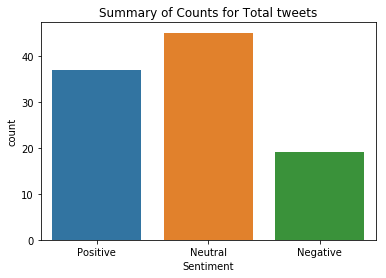

In [17]:
#sns.countplot(df["Sentiment"],facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))
sns.countplot(df["Sentiment"])
plt.title("Summary of Counts for Total tweets")


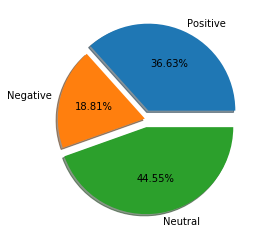

In [18]:
# Piechart 
#string, used to label the wedges with their numeric value. The label will be placed inside the wedge. The format string will be fmt%pct.

a=len(df[df["Sentiment"]=="Positive"])
b=len(df[df["Sentiment"]=="Negative"])
c=len(df[df["Sentiment"]=="Neutral"])
d=np.array([a,b,c])
explode = (0.1, 0.0, 0.1)
plt.pie(d,shadow=True,explode=explode,labels=["Positive","Negative","Neutral"],autopct='%1.2f%%');

Text(0.5, 1.0, 'Summary of Counts for Total tweets,Distributed by if the User has a verified Account or not')

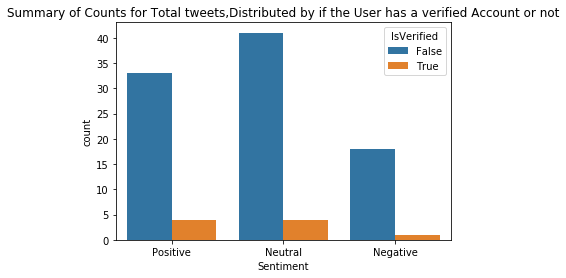

In [19]:
sns.countplot(df["Sentiment"],hue=df.IsVerified)
plt.title("Summary of Counts for Total tweets,Distributed by if the User has a verified Account or not")

# Generate WordCloud

In [20]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

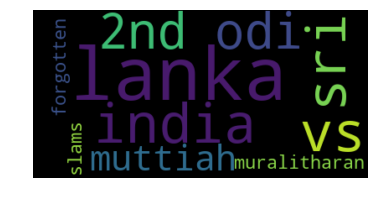

In [21]:
# Start with one review:

text = df.clean_tweet[2]

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=10).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- **WordCloud for whole data(Topic not included in WordCloud)**

There are 8450 words in the combination of all review.


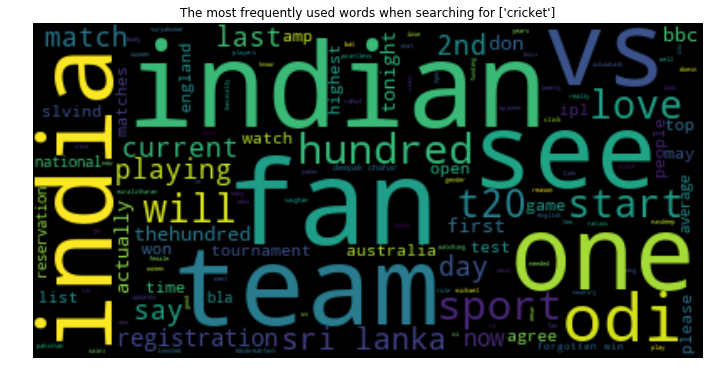

In [22]:
# Combine all reviews into one big text and create a Cloud to see which Words are most common in these Tweets.

text = " ".join(review for review in df.clean_tweet)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords

text_newALL = prepCloud(text,Topic)


# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_newALL)

# Display the generated image:
# the matplotlib way:


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic),)
plt.axis("off")
plt.show()

## NEW

- **Wordcloud for Positive tweets only (Topic not included in WordCloud)**

There are 8450 words in the combination of all review.


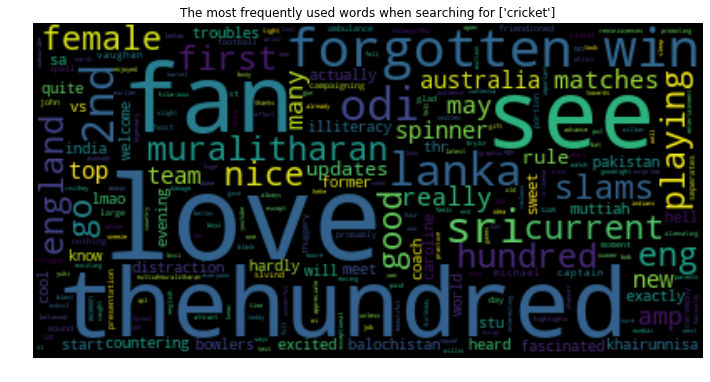

In [23]:
# Combine POSITIVE reviews into one big text and create a Cloud to see which Words are most common in these Tweets.

text_positive = " ".join(review for review in df[df["Sentiment"]=="Positive"].clean_tweet)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["and", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords
#text_positive=" ".join([word for word in text_positive.split() if word not in stopwords])

text_new_positive = prepCloud(text_positive,Topic)

#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_new_positive)

# Display the generated image:
# the matplotlib way:


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic))
plt.axis("off")
plt.show()

- **Wordcloud for Negative tweets only  (Topic not included in WordCloud)**

There are 8450 words in the combination of all review.


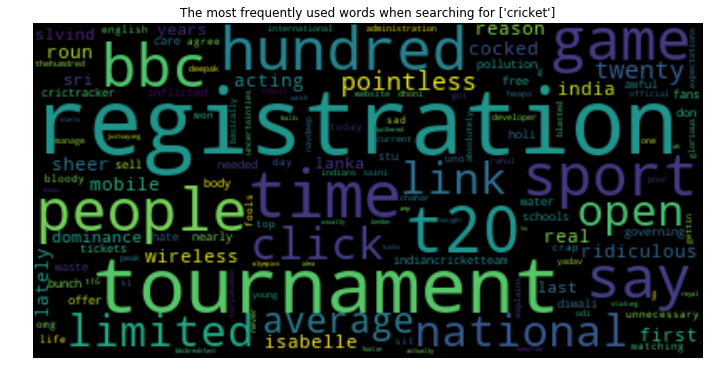

In [24]:
# Combine Negative reviews into one big text and create a Cloud to see which Words are most common in these Tweets.

text_negative = " ".join(review for review in df[df["Sentiment"]=="Negative"].clean_tweet)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["and", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords

#text_negative=" ".join([word for word in text_negative.split() if word not in stopwords])
text_new_negative = prepCloud(text_negative,Topic)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_new_negative)

# Display the generated image:
# the matplotlib way:


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic))
plt.axis("off")
plt.show()

# Import image in streamlit.

import streamlit as st
from PIL import Image
import os
os.chdir("F:/Machine Learning/AI ML/Case Studies/Flask/TwitterFromScratch")
image = Image.open('Logo.jpg')
st.image(image, caption='Sunrise by the mountains',use_column_width=True)
st.pyplot()

In [26]:
"""
Created on Thu Oct 05 17:42:01 2020

@author: Abhishek Darekar
"""



import streamlit as st
import warnings
warnings.filterwarnings("ignore")
# EDA Pkgs
import pandas as pd
import numpy as np
import pandas as pd
import tweepy
import json
from tweepy import OAuthHandler
import re
import textblob
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import openpyxl
import time
import tqdm

#To Hide Warnings
st.set_option('deprecation.showfileUploaderEncoding', False)
st.set_option('deprecation.showPyplotGlobalUse', False)
# Viz Pkgs
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('Agg')
import seaborn as sns
#sns.set_style('darkgrid')


STYLE = """
<style>
img {
    max-width: 100%;
}
</style> """

def main():
    """ Common ML Dataset Explorer """
    #st.title("Live twitter Sentiment analysis")
    #st.subheader("Select a topic which you'd like to get the sentiment analysis on :")

    html_temp = """
	<div style="background-color:tomato;"><p style="color:white;font-size:40px;padding:9px">Live twitter Sentiment analysis</p></div>
	"""
    st.markdown(html_temp, unsafe_allow_html=True)
    st.subheader("Select a topic which you'd like to get the sentiment analysis on :")

    ################# Twitter API Connection #######################
    consumer_key = "YCyZzlGlH4bVcgu9DEtXGGCtb"
    consumer_secret = "zBH1Yus7hpCE7R1P9oRTqu7fHXzSKRzWNfGQRLQ3qA3HsuH3V5"
    access_token = "1406151650465648640-HNSctNOHvpkYIiwNaUnIwCL6uhpycN"
    access_token_secret = "fuR5lHVZKOdNB1Qn9A2awjzSuqtptFLwHu5muErvzH5gI"



    # Use the above credentials to authenticate the API.

    auth = tweepy.OAuthHandler( consumer_key , consumer_secret )
    auth.set_access_token( access_token , access_token_secret )
    api = tweepy.API(auth)
    ################################################################
    
    df = pd.DataFrame(columns=["Date","User","IsVerified","Tweet","Likes","RT",'User_location'])
    
    # Write a Function to extract tweets:
    def get_tweets(Topic,Count):
        i=0
        #my_bar = st.progress(100) # To track progress of Extracted tweets
        for tweet in tweepy.Cursor(api.search, q=Topic,count=100, lang="en",exclude='retweets').items():
            #time.sleep(0.1)
            #my_bar.progress(i)
            df.loc[i,"Date"] = tweet.created_at
            df.loc[i,"User"] = tweet.user.name
            df.loc[i,"IsVerified"] = tweet.user.verified
            df.loc[i,"Tweet"] = tweet.text
            df.loc[i,"Likes"] = tweet.favorite_count
            df.loc[i,"RT"] = tweet.retweet_count
            df.loc[i,"User_location"] = tweet.user.location
            #df.to_csv("TweetDataset.csv",index=False)
            #df.to_excel('{}.xlsx'.format("TweetDataset"),index=False)   ## Save as Excel
            i=i+1
            if i>Count:
                break
            else:
                pass
    # Function to Clean the Tweet.
    def clean_tweet(tweet):
        return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([RT])', ' ', tweet.lower()).split())
    
        
    # Funciton to analyze Sentiment
    def analyze_sentiment(tweet):
        analysis = TextBlob(tweet)
        if analysis.sentiment.polarity > 0:
            return 'Positive'
        elif analysis.sentiment.polarity == 0:
            return 'Neutral'
        else:
            return 'Negative'
    
    #Function to Pre-process data for Worlcloud
    def prepCloud(Topic_text,Topic):
        Topic = str(Topic).lower()
        Topic=' '.join(re.sub('([^0-9A-Za-z \t])', ' ', Topic).split())
        Topic = re.split("\s+",str(Topic))
        stopwords = set(STOPWORDS)
        stopwords.update(Topic) ### Add our topic in Stopwords, so it doesnt appear in wordClous
        ###
        text_new = " ".join([txt for txt in Topic_text.split() if txt not in stopwords])
        return text_new

    
    #
    from PIL import Image
    image = Image.open('Logo1.jpg')
    st.image(image, caption='Twitter for Analytics',use_column_width=True)
    
    
    # Collect Input from user :
    Topic = str()
    Topic = str(st.text_input("Enter the topic you are interested in (Press Enter once done)"))     
    
    if len(Topic) > 0 :
        
        # Call the function to extract the data. pass the topic and filename you want the data to be stored in.
        with st.spinner("Please wait, Tweets are being extracted"):
            get_tweets(Topic , Count=200)
        st.success('Tweets have been Extracted !!!!')    
           
    
        # Call function to get Clean tweets
        df['clean_tweet'] = df['Tweet'].apply(lambda x : clean_tweet(x))
    
        # Call function to get the Sentiments
        df["Sentiment"] = df["Tweet"].apply(lambda x : analyze_sentiment(x))
        
        
        # Write Summary of the Tweets
        st.write("Total Tweets Extracted for Topic '{}' are : {}".format(Topic,len(df.Tweet)))
        st.write("Total Positive Tweets are : {}".format(len(df[df["Sentiment"]=="Positive"])))
        st.write("Total Negative Tweets are : {}".format(len(df[df["Sentiment"]=="Negative"])))
        st.write("Total Neutral Tweets are : {}".format(len(df[df["Sentiment"]=="Neutral"])))
        
        # See the Extracted Data : 
        if st.button("See the Extracted Data"):
            #st.markdown(html_temp, unsafe_allow_html=True)
            st.success("Below is the Extracted Data :")
            st.write(df.head(50))
        
        
        # get the countPlot
        if st.button("Get Count Plot for Different Sentiments"):
            st.success("Generating A Count Plot")
            st.subheader(" Count Plot for Different Sentiments")
            st.write(sns.countplot(df["Sentiment"]))
            st.pyplot()
        
        # Piechart 
        if st.button("Get Pie Chart for Different Sentiments"):
            st.success("Generating A Pie Chart")
            a=len(df[df["Sentiment"]=="Positive"])
            b=len(df[df["Sentiment"]=="Negative"])
            c=len(df[df["Sentiment"]=="Neutral"])
            d=np.array([a,b,c])
            explode = (0.1, 0.0, 0.1)
            st.write(plt.pie(d,shadow=True,explode=explode,labels=["Positive","Negative","Neutral"],autopct='%1.2f%%'))
            st.pyplot()
            
            
        # get the countPlot Based on Verified and unverified Users
        if st.button("Get Count Plot Based on Verified and unverified Users"):
            st.success("Generating A Count Plot (Verified and unverified Users)")
            st.subheader(" Count Plot for Different Sentiments for Verified and unverified Users")
            st.write(sns.countplot(df["Sentiment"],hue=df.IsVerified))
            st.pyplot()
        
        
        ## Points to add 1. Make Backgroud Clear for Wordcloud 2. Remove keywords from Wordcloud
        
        
        # Create a Worlcloud
        if st.button("Get WordCloud for all things said about {}".format(Topic)):
            st.success("Generating A WordCloud for all things said about {}".format(Topic))
            text = " ".join(review for review in df.clean_tweet)
            stopwords = set(STOPWORDS)
            text_newALL = prepCloud(text,Topic)
            wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_newALL)
            st.write(plt.imshow(wordcloud, interpolation='bilinear'))
            st.pyplot()
        
        
        #Wordcloud for Positive tweets only
        if st.button("Get WordCloud for all Positive Tweets about {}".format(Topic)):
            st.success("Generating A WordCloud for all Positive Tweets about {}".format(Topic))
            text_positive = " ".join(review for review in df[df["Sentiment"]=="Positive"].clean_tweet)
            stopwords = set(STOPWORDS)
            text_new_positive = prepCloud(text_positive,Topic)
            #text_positive=" ".join([word for word in text_positive.split() if word not in stopwords])
            wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_new_positive)
            st.write(plt.imshow(wordcloud, interpolation='bilinear'))
            st.pyplot()
        
        
        #Wordcloud for Negative tweets only       
        if st.button("Get WordCloud for all Negative Tweets about {}".format(Topic)):
            st.success("Generating A WordCloud for all Positive Tweets about {}".format(Topic))
            text_negative = " ".join(review for review in df[df["Sentiment"]=="Negative"].clean_tweet)
            stopwords = set(STOPWORDS)
            text_new_negative = prepCloud(text_negative,Topic)
            #text_negative=" ".join([word for word in text_negative.split() if word not in stopwords])
            wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_new_negative)
            st.write(plt.imshow(wordcloud, interpolation='bilinear'))
            st.pyplot()
        
        
        
        
        
    st.sidebar.header("About App")
    st.sidebar.info("A Twitter Sentiment analysis Project which will scrap twitter for the topic selected by the user. The extracted tweets will then be used to determine the Sentiments of those tweets. \
                    The different Visualizations will help us get a feel of the overall mood of the people on Twitter regarding the topic we select.")
    st.sidebar.text("Built with Streamlit")
    
    st.sidebar.header("For Any Queries/Suggestions Please reach out at :")
    st.sidebar.info("darekarabhishek@gmail.com")
    #st.sidebar.subheader("Scatter-plot setup")
    #box1 = st.sidebar.selectbox(label= "X axis", options = numeric_columns)
    #box2 = st.sidebar.selectbox(label="Y axis", options=numeric_columns)
    #sns.jointplot(x=box1, y= box2, data=df, kind = "reg", color= "red")
    #st.pyplot()



    if st.button("Exit"):
        st.balloons()



if __name__ == '__main__':
    main()



2021-07-21 12:22:05.935 
  command:

    streamlit run C:\Users\Virender Pal Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [28]:
!streamlit run C:\Users\Virender Pal Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...

Error: Streamlit requires raw Python (.py) files, but the provided file has no extension.
For more information, please see https://docs.streamlit.io


In [29]:
!streamlit run App_Streamlit.py

^C


In [ ]:
!streamlit hello